Train a binary text classification model using TensorFlow 2 to classify IMDB movie reviews as positive or negative.

In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [4]:
#Load the IMDB dataset
vocab_size=10000
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step


In [5]:
#Pad sequence to the same length
maxlen=200
X_train=tf.keras.preprocessing.sequence.pad_sequences(X_train,maxlen=maxlen)
X_test=tf.keras.preprocessing.sequence.pad_sequences(X_test,maxlen=maxlen)

In [7]:
#Build the model
model=Sequential([
    layers.Embedding(input_dim=vocab_size,output_dim=64,input_length=maxlen),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history=model.fit(X_train,y_train,epochs=3,batch_size=64,validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 198ms/step - accuracy: 0.6672 - loss: 0.5705 - val_accuracy: 0.8674 - val_loss: 0.3202
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 206ms/step - accuracy: 0.9077 - loss: 0.2396 - val_accuracy: 0.8590 - val_loss: 0.3393
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 203ms/step - accuracy: 0.9376 - loss: 0.1762 - val_accuracy: 0.8756 - val_loss: 0.3417


In [10]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

Test Accuracy: 0.87


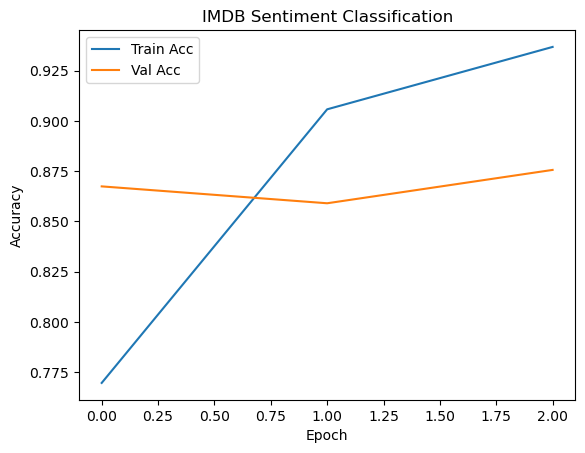

In [11]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("IMDB Sentiment Classification")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()